The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

This dataset was obtained from [UCI's Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set#)

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading and analyzing the dataset 

In [2]:
housing = pd.read_csv("real_estate_valuation.csv")
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
housing.shape

(414, 8)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Dropping unnecessary columns 

In [5]:
housing = housing.drop(
    ["No", "X1 transaction date", "X5 latitude", "X6 longitude"], axis=1
)
housing.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


## Data Split 

### Importing libraries 

In [6]:
from sklearn.model_selection import train_test_split

### Performing data split 

In [7]:
X = housing[
    [
        "X2 house age",
        "X3 distance to the nearest MRT station",
        "X4 number of convenience stores",
    ]
]  # independent variables
Y = housing["Y house price of unit area"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2
)  # splitting the data into 80% for training and 20% for testing

In [9]:
X_train.shape, y_train.shape

((331, 3), (331,))

In [10]:
X_test.shape, y_test.shape

((83, 3), (83,))

## Linear Regression Model 

### Importing libraries 

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Building the training model 

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(X_test)  # applying trained model to make predictions on test set

### Prediction results 

In [14]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_pred), 2))
print("Coefficient of determination (R^2):", round(r2_score(y_test, y_pred), 2))

Coefficients: [-0.25549816 -0.0057055   1.36434429]
Intercept: 43.11711128823377
Mean Squared Error (MSE): 57.79
Coefficient of determination (R^2): 0.55


In [15]:
print(
    "The 3 columns of house age, distance to station and number of convinience stores can explain {} % of the variation in the target variable".format(
        round(r2_score(y_test, y_pred), 4) * 100
    )
)

The 3 columns of house age, distance to station and number of convinience stores can explain 54.730000000000004 % of the variation in the target variable


## Visualization 

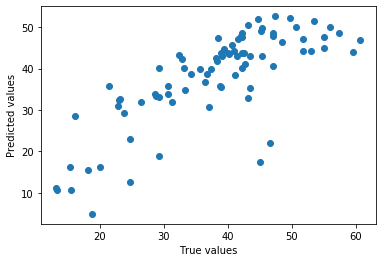

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

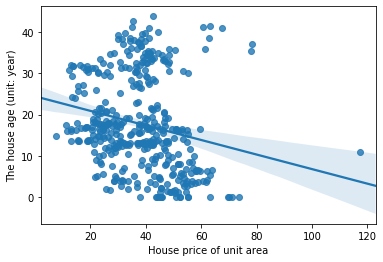

In [17]:
sns.regplot(housing["Y house price of unit area"], housing["X2 house age"])
plt.xlabel("House price of unit area")
plt.ylabel("The house age (unit: year)")
plt.show()

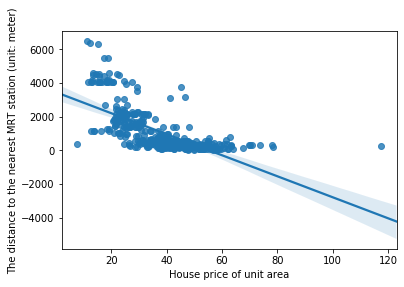

In [18]:
sns.regplot(
    housing["Y house price of unit area"],
    housing["X3 distance to the nearest MRT station"],
)
plt.xlabel("House price of unit area")
plt.ylabel("The distance to the nearest MRT station (unit: meter)")
plt.show()

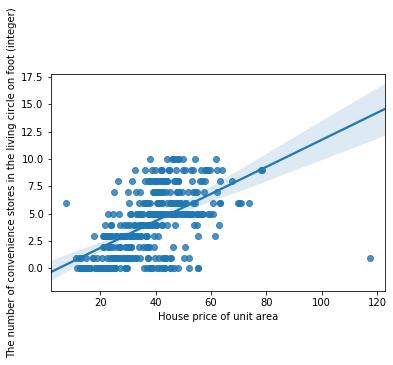

In [19]:
sns.regplot(
    housing["Y house price of unit area"], housing["X4 number of convenience stores"]
)
plt.xlabel("House price of unit area")
plt.ylabel("The number of convenience stores in the living circle on foot (integer)")
plt.show()

As can be observed from the scatter plots above, there is a positive correlation between house price and the number of convinience stores while there is a negative correlation between the house price and the other 2 independent variables.

## Cross-validation 

### Importing datasets 

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

### Performing 6-fold cross-validation 

In [21]:
scores = cross_val_score(model, X, Y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.62340359 0.53950184 0.65710208 0.37209442 0.44086126 0.6499054 ]


### Predictions using the cross-validated model 

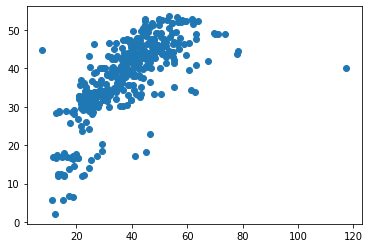

In [22]:
predictions = cross_val_predict(model, X, Y, cv=6)
plt.scatter(Y, predictions)
plt.show()

There are 6 times as many points as the original plot as cv = 6.

### Checking the R^2 score 

In [23]:
accuracy = r2_score(Y, predictions)
print("The cross-validated accuracy is {}.".format(accuracy))

The cross-validated accuracy is 0.5367629041482636.
